In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.v1i.yolov8.zip to dataset.v1i.yolov8.zip


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
import zipfile
import os


zip_file_path = next(iter(uploaded.keys()))  # Get the name of the uploaded file
extract_folder = '/content/dataset'  # Destination folder for extraction

# Create a directory to extract files to
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Check if the dataset has been extracted correctly
print('Extracted files:', os.listdir(extract_folder))
# Extract the uploaded dataset ZIP file

dataset_dir = os.path.join(extract_folder)  # Adjust path if necessary
print('Dataset structure:', os.listdir(dataset_dir))


Extracted files: ['README.roboflow.txt', 'data.yaml', 'train', 'test', 'README.dataset.txt', 'valid']
Dataset structure: ['README.roboflow.txt', 'data.yaml', 'train', 'test', 'README.dataset.txt', 'valid']


In [ ]:
from ultralytics import YOLO
import shutil
import os

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# Fine-tune the model
model.train(
    data='/content/dataset/data.yaml',
    epochs=100,  # Number of epochs
    imgsz=640,   # Image size
    batch=16,    # Batch size
    lr0=0.01,    # Initial learning rate
    lrf=0.1,     # Final learning rate (multiplier of lr0)
    momentum=0.937,  # Momentum for SGD
    weight_decay=0.0005,  # Weight decay
    warmup_epochs=3,  # Number of warmup epochs
    augment=True,  # Enable data augmentation
    rect=True,     # Rectangular training
    save_period=10  # Save checkpoint every 10 epochs

)

# Evaluate the model
metrics = model.val()

# Extract and print metrics
precision = metrics.box.mp   # Mean precision of all classes
recall = metrics.box.mr      # Mean recall of all classes
map50 = metrics.box.map50    # mAP at IoU 0.5
map50_95 = metrics.box.map   # mAP at IoU 0.5:0.95

# Calculate approximate accuracy (simplified formula)
accuracy = (precision * recall) / (precision + recall) * 2 if (precision + recall) > 0 else 0

# Print metrics
print(f"Mean Precision: {precision:.4f}")
print(f"Mean Recall: {recall:.4f}")
print(f"mAP@0.5: {map50:.4f}")
print(f"mAP@0.5:0.95: {map50_95:.4f}")
print(f"Accuracy (approx.): {accuracy:.4f}")

# Save the model in ONNX format
model.export(format='onnx')

# Save the model in .pt format
# Since YOLO does not directly support saving as .pt, you may need to save it manually if needed.
model_path = 'trained_model.pt'
model.model.save(model_path)  # This saves the model weights to .pt file

# Save all files generated during training
# Assume that the training results are saved in the 'runs' directory
training_results_dir = '/content/runs/train'
saved_dir = '/content/saved_model_and_results'
os.makedirs(saved_dir, exist_ok=True)

# Copy training results to the new directory
for item in os.listdir(training_results_dir):
    s = os.path.join(training_results_dir, item)
    d = os.path.join(saved_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, True)
    else:
        shutil.copy2(s, d)

print(f"Training results saved in: {saved_dir}")


100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]


Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 26.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 477 images, 0 backgrounds, 0 corrupt: 100%|██████████| 477/477 [00:00<00:00, 1615.98it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/valid/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 669.96it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.44G      1.411      3.338      1.333         38        640: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         23         24    0.00449      0.976      0.356      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.24G       1.46      2.554      1.331         29        640: 100%|██████████| 30/30 [00:10<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23         24      0.957      0.238      0.511      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.24G      1.382      2.261      1.274         33        640: 100%|██████████| 30/30 [00:06<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         23         24      0.852      0.284      0.327      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.24G      1.467      2.124      1.336         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         23         24      0.682      0.285      0.204      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.24G      1.454      1.933      1.311         38        640: 100%|██████████| 30/30 [00:07<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         23         24      0.912      0.214      0.275      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.24G      1.475      1.816       1.34         31        640: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         23         24      0.811      0.352      0.347      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.24G      1.417       1.64      1.306         37        640: 100%|██████████| 30/30 [00:08<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         23         24      0.859      0.424      0.505       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.24G      1.441      1.515       1.32         38        640: 100%|██████████| 30/30 [00:07<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         23         24      0.936      0.381      0.571      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.24G       1.38      1.373      1.266         27        640: 100%|██████████| 30/30 [00:08<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         23         24      0.873      0.381      0.576      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.24G      1.382      1.343      1.254         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         23         24      0.906      0.414      0.546      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.24G      1.355      1.262      1.264         35        640: 100%|██████████| 30/30 [00:09<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         23         24      0.927      0.357      0.522      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.24G      1.349       1.18      1.246         30        640: 100%|██████████| 30/30 [00:06<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         23         24       0.97      0.375      0.475       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.24G      1.314      1.138      1.229         27        640: 100%|██████████| 30/30 [00:09<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         23         24       0.91      0.476      0.571      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.24G      1.325      1.081      1.234         37        640: 100%|██████████| 30/30 [00:06<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         23         24      0.949       0.42      0.537      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.24G      1.297      1.006      1.212         37        640: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         23         24      0.908      0.452      0.527      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.24G      1.282      1.002      1.209         27        640: 100%|██████████| 30/30 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         23         24      0.932      0.381      0.496      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.24G      1.289     0.9902      1.217         38        640: 100%|██████████| 30/30 [00:07<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         23         24      0.943      0.429      0.602      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.24G      1.197      0.948      1.167         25        640: 100%|██████████| 30/30 [00:09<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         23         24      0.949      0.423      0.477      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.24G      1.203     0.8836      1.162         30        640: 100%|██████████| 30/30 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         23         24      0.913      0.476      0.545       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.24G      1.213     0.8749      1.181         37        640: 100%|██████████| 30/30 [00:09<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         23         24      0.948      0.452      0.476      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.24G      1.221     0.8683      1.173         37        640: 100%|██████████| 30/30 [00:06<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all         23         24      0.347      0.487      0.652      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.24G      1.216     0.8817      1.184         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         23         24      0.947      0.404      0.541       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.24G      1.149     0.8417      1.157         37        640: 100%|██████████| 30/30 [00:07<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         23         24       0.53      0.643      0.591      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.24G      1.172     0.8532      1.155         38        640: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         23         24       0.42      0.554      0.594      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.24G      1.166     0.8052      1.133         25        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         23         24        0.5      0.786      0.576      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.24G       1.14     0.8371      1.157         34        640: 100%|██████████| 30/30 [00:07<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         23         24      0.501      0.786       0.61      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.24G      1.177     0.8127      1.144         38        640: 100%|██████████| 30/30 [00:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         23         24      0.928      0.426       0.54      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.24G      1.105     0.7876      1.128         27        640: 100%|██████████| 30/30 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         23         24      0.508      0.776       0.62      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.24G      1.108     0.7535      1.138         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         23         24      0.854      0.616      0.761      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.24G      1.124       0.75      1.127         37        640: 100%|██████████| 30/30 [00:06<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         23         24      0.762      0.777      0.698      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.24G      1.143     0.7257      1.125         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         23         24      0.589      0.643      0.684      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.24G      1.055     0.7111      1.084         38        640: 100%|██████████| 30/30 [00:07<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23         24      0.447      0.429      0.416      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.24G      1.054     0.7051      1.107         27        640: 100%|██████████| 30/30 [00:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         23         24      0.902      0.491      0.496      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.24G      1.092     0.6698      1.096         37        640: 100%|██████████| 30/30 [00:08<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         23         24      0.864      0.571      0.673      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.24G      1.094     0.6869      1.118         27        640: 100%|██████████| 30/30 [00:06<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         23         24      0.843      0.643       0.71       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.24G      1.034     0.6781      1.088         28        640: 100%|██████████| 30/30 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         23         24      0.906      0.452      0.531      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.24G      1.055     0.6549      1.077         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         23         24      0.591      0.619      0.686      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.24G       1.01       0.64      1.052         25        640: 100%|██████████| 30/30 [00:09<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         23         24      0.888      0.619      0.653      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.24G      0.991     0.6325      1.063         23        640: 100%|██████████| 30/30 [00:06<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         23         24       0.38        0.5      0.585      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.24G      1.002      0.615      1.083         25        640: 100%|██████████| 30/30 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         23         24       0.93      0.476      0.516      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.24G      1.021     0.6111      1.083         38        640: 100%|██████████| 30/30 [00:07<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         23         24      0.517      0.643      0.629      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.24G       1.02     0.6022      1.072         35        640: 100%|██████████| 30/30 [00:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         23         24      0.957      0.738      0.791      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.24G     0.9888      0.614      1.073         27        640: 100%|██████████| 30/30 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         23         24      0.928      0.424      0.512      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.24G      1.021     0.6038      1.076         37        640: 100%|██████████| 30/30 [00:07<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         23         24      0.878       0.77      0.772      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.24G     0.9829     0.5775      1.059         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         23         24      0.839      0.524       0.65      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.24G      1.009     0.6037      1.069         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         23         24      0.808      0.595      0.638      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.24G     0.9961     0.5678      1.066         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         23         24      0.429      0.619       0.51      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.24G     0.9547     0.5898      1.054         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         23         24      0.922      0.571      0.652      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.24G     0.9373     0.5484      1.034         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         23         24      0.868      0.619       0.63      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.24G     0.9213     0.5431       1.04         32        640: 100%|██████████| 30/30 [00:07<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         23         24      0.894      0.556      0.671      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.24G     0.8797     0.5436      1.015         31        640: 100%|██████████| 30/30 [00:08<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         23         24      0.413      0.476      0.519       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.24G     0.8861     0.5299      1.022         38        640: 100%|██████████| 30/30 [00:08<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         23         24      0.902      0.429      0.556      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.24G     0.9081      0.535      1.018         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         23         24      0.933      0.571      0.666      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.24G     0.9002     0.5278      1.027         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         23         24      0.786      0.619      0.644      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.24G     0.8805     0.5195      1.014         27        640: 100%|██████████| 30/30 [00:06<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         23         24      0.486      0.619      0.576      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.24G     0.8995     0.5294      1.006         24        640: 100%|██████████| 30/30 [00:09<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         23         24      0.928      0.429      0.477      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.24G     0.8664     0.5082     0.9901         36        640: 100%|██████████| 30/30 [00:07<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         23         24      0.877      0.619      0.643      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.24G     0.8447     0.4952      1.004         32        640: 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         23         24      0.947      0.429      0.455        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.24G     0.8305     0.4873     0.9971         38        640: 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         23         24      0.431       0.45      0.471      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.24G     0.8389     0.4998     0.9905         38        640: 100%|██████████| 30/30 [00:07<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         23         24      0.691      0.589      0.571      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.24G     0.8291     0.4914     0.9821         35        640: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         23         24      0.712      0.738      0.657      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.24G     0.7992     0.4992     0.9753         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         23         24      0.586      0.603      0.595      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.24G     0.8186     0.4976     0.9775         34        640: 100%|██████████| 30/30 [00:09<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         23         24      0.624      0.762      0.605      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.24G     0.8143     0.4688     0.9658         37        640: 100%|██████████| 30/30 [00:06<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         23         24      0.429      0.619      0.485      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.24G     0.7756     0.4603     0.9535         27        640: 100%|██████████| 30/30 [00:08<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         23         24      0.928      0.452      0.449      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.24G     0.8002     0.4589     0.9764         27        640: 100%|██████████| 30/30 [00:07<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23         24      0.952       0.45      0.467      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.24G     0.7519     0.4416     0.9507         38        640: 100%|██████████| 30/30 [00:07<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         23         24      0.644      0.612      0.668      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.24G       0.78     0.4439     0.9628         38        640: 100%|██████████| 30/30 [00:08<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         23         24      0.948      0.429      0.499      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.24G     0.7921     0.4428     0.9689         34        640: 100%|██████████| 30/30 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         23         24      0.947      0.429      0.444      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.24G     0.7606     0.4342     0.9491         37        640: 100%|██████████| 30/30 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         23         24      0.609      0.595      0.554      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.24G     0.7596     0.4361      0.957         37        640: 100%|██████████| 30/30 [00:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         23         24      0.861      0.619       0.68      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.24G     0.7698     0.4423     0.9494         33        640: 100%|██████████| 30/30 [00:09<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         23         24      0.945      0.429      0.514      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.24G     0.7757     0.4408      0.952         35        640: 100%|██████████| 30/30 [00:07<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         23         24      0.861      0.586       0.72      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.24G     0.7751     0.4306     0.9578         38        640: 100%|██████████| 30/30 [00:08<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         23         24      0.929      0.452      0.522      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.24G     0.7155     0.4138     0.9353         37        640: 100%|██████████| 30/30 [00:08<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         23         24      0.952      0.448      0.502      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.24G     0.6949     0.4158     0.9288         38        640: 100%|██████████| 30/30 [00:07<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         23         24      0.616      0.619       0.55      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.24G     0.7077     0.4028     0.9259         28        640: 100%|██████████| 30/30 [00:08<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         23         24      0.945      0.405      0.506      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.24G     0.7163     0.4107     0.9356         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         23         24      0.471      0.619      0.662      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.24G     0.6772     0.3958     0.9181         37        640: 100%|██████████| 30/30 [00:08<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         23         24      0.931      0.449      0.503      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.24G     0.6781     0.4008     0.9241         25        640: 100%|██████████| 30/30 [00:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         23         24      0.897      0.452      0.549       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.24G     0.6729     0.3961     0.9312         28        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         23         24      0.951      0.452      0.465      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.24G     0.6431     0.3863     0.9092         38        640: 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         23         24      0.951      0.452        0.5      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.24G     0.6653      0.388     0.9062         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         23         24      0.412      0.447        0.5      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.24G     0.6478     0.3798     0.9146         34        640: 100%|██████████| 30/30 [00:09<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         23         24      0.952      0.451      0.491      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.24G     0.6617     0.3813     0.9159         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         23         24      0.524      0.599      0.546      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.24G     0.6295      0.373     0.9072         22        640: 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         23         24      0.503      0.619      0.586      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.24G     0.6204     0.3723     0.9088         33        640: 100%|██████████| 30/30 [00:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         23         24      0.432      0.513      0.541      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.24G     0.5956     0.3605     0.9036         38        640: 100%|██████████| 30/30 [00:08<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         23         24      0.589      0.619      0.554      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.24G     0.5892     0.3616     0.9011         35        640: 100%|██████████| 30/30 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         23         24      0.637      0.619      0.542      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.24G     0.6129     0.3668     0.9135         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         23         24      0.532      0.547       0.55      0.384


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.38G     0.5765     0.3564     0.8789         37        640: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         23         24      0.951      0.452      0.545      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.24G     0.5731     0.3547     0.8834         38        640: 100%|██████████| 30/30 [00:07<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         23         24      0.928      0.452      0.503      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.24G     0.5738     0.3538     0.8779         38        640: 100%|██████████| 30/30 [00:08<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         23         24      0.929      0.452      0.482      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.24G     0.5726     0.3505     0.8814         27        640: 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         23         24      0.903      0.452      0.539      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.24G     0.5535     0.3486     0.8789         33        640: 100%|██████████| 30/30 [00:07<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         23         24      0.952      0.452      0.485      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.24G     0.5448     0.3379     0.8713         34        640: 100%|██████████| 30/30 [00:09<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         23         24      0.951      0.452       0.46      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.24G      0.541     0.3316     0.8874         38        640: 100%|██████████| 30/30 [00:06<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         23         24      0.949      0.452      0.458       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.24G     0.5554     0.3429     0.8842         28        640: 100%|██████████| 30/30 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         23         24       0.95      0.452      0.441      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.24G     0.5451     0.3304     0.8747         25        640: 100%|██████████| 30/30 [00:06<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         23         24      0.951      0.452      0.431      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.24G     0.5554     0.3421     0.8784         25        640: 100%|██████████| 30/30 [00:09<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         23         24      0.951      0.452      0.524      0.366



100 epochs completed in 0.265 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


                   all         23         24      0.855      0.643      0.726      0.519
             num_plate          3          3       0.87      0.333      0.502      0.419
          number_plate         21         21       0.84      0.952      0.951      0.619
Speed: 0.2ms preprocess, 17.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


                   all         23         24      0.854      0.643      0.727      0.519
             num_plate          3          3       0.87      0.333      0.502      0.419
          number_plate         21         21      0.839      0.952      0.951      0.619
Speed: 0.4ms preprocess, 70.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2
Mean Precision: 0.8545
Mean Recall: 0.6429
mAP@0.5: 0.7266
mAP@0.5:0.95: 0.5191
Accuracy (approx.): 0.7337
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 173.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtim

TypeError: 'list' object is not callable

In [ ]:
from ultralytics import YOLO
import shutil
import os
import torch
pt_model_path = 'trained_model.pt'
# Access the PyTorch model directly and save its state_dict
torch.save(model.model.state_dict(), pt_model_path)

# Save all files generated during training
# Assume that the training results are saved in the 'runs' directory
training_results_dir = '/content/runs/detect/train'
saved_dir = '/content/saved_model_and_results'
os.makedirs(saved_dir, exist_ok=True)

# Copy training results to the new directory
for item in os.listdir(training_results_dir):
    s = os.path.join(training_results_dir, item)
    d = os.path.join(saved_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)  # Correct usage for Python 3.8+
    else:
        shutil.copy2(s, d)

print(f"Training results saved in: {saved_dir}")

Training results saved in: /content/saved_model_and_results


In [ ]:
from google.colab import files

# Upload the image file
uploaded = files.upload()


Saving best.pt to best.pt


In [ ]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/best.pt')


In [ ]:
from google.colab import files

# Upload the image file
uploaded = files.upload()


Saving cars.jpg to cars.jpg


In [ ]:
# Perform inference on the image
results = model(image_path)  # This will return the inference results


AttributeError: module 'torch._dynamo.variables' has no attribute 'LazyVariableTracker'

In [ ]:
# Perform inference
results = model.predict(source=image_path)

# Plot results
for result in results:
    result.plot()  # Automatically displays the image with predictions


AttributeError: module 'torch._dynamo.variables' has no attribute 'LazyVariableTracker'

NameError: name 'results' is not defined

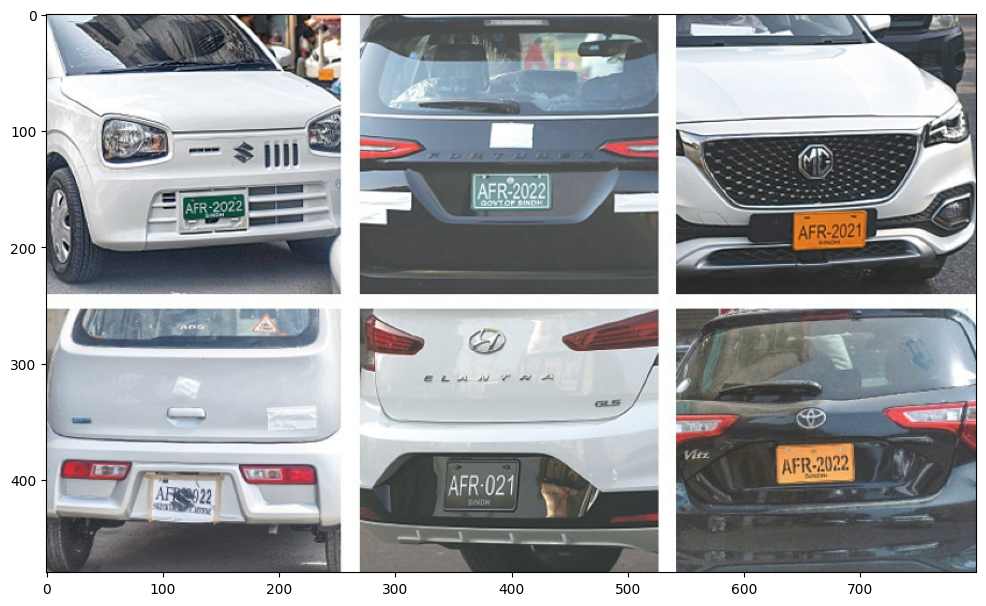

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
image_path = list(uploaded.keys())[0]
# Load the uploaded image
img = Image.open(image_path)

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(img)
ax = plt.gca()

# Process each result
for result in results:
    # Loop through detections
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = box.tolist()
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,
            linewidth=1, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)

        # Optional: Display class names and confidence
        class_id = int(result.boxes.cls[0])  # Class ID
        class_name = result.names[class_id]  # Class name
        confidence = result.boxes.conf[0]  # Confidence score
        plt.text(x1, y1, f'{class_name} {confidence:.2f}',
                 color='red', fontsize=12, weight='bold')

plt.axis('off')
plt.show()


In [ ]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/best.pt')

# Path to the uploaded image
image_path = list(uploaded.keys())[0]

# Perform inference
results = model.predict(source=image_path)

# Print detailed information for each detected object
for result in results:
    # Iterate through each detected object
    for box, class_id, confidence in zip(result.boxes.xyxy, result.boxes.cls, result.boxes.conf):
        x1, y1, x2, y2 = box.tolist()
        class_name = result.names[int(class_id)]  # Get class name from class ID

        # Print the details
        print(f"Class ID: {int(class_id)}")
        print(f"Class Name: {class_name}")
        print(f"Bounding Box: [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")
        print(f"Confidence: {confidence:.2f}")
        print("-" * 30)  # Separator for readability


AttributeError: module 'torch._dynamo.variables' has no attribute 'LazyVariableTracker'

NameError: name 'results' is not defined

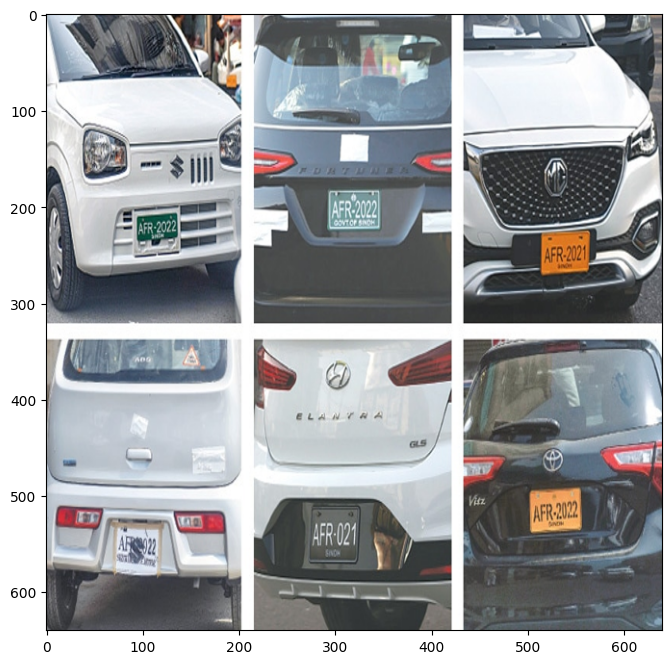

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

image_path = list(uploaded.keys())[0]

# Load the uploaded image
img = Image.open(image_path)

# Resize the image to 640x640
img = img.resize((640, 640))

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(img)
ax = plt.gca()

# Process each result
for result in results:
    # Loop through detections
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = box.tolist()

        # Adjust bounding boxes for the resized image
        x1 = max(0, min(x1, 640))
        y1 = max(0, min(y1, 640))
        x2 = max(0, min(x2, 640))
        y2 = max(0, min(y2, 640))

        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,
            linewidth=1, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)

        # Optional: Display class names and confidence
        class_id = int(result.boxes.cls[0])  # Class ID
        class_name = result.names[class_id]  # Class name
        confidence = result.boxes.conf[0]  # Confidence score
        plt.text(x1, y1, f'{class_name} {confidence:.2f}',
                 color='red', fontsize=12, weight='bold')

plt.axis('off')
plt.show()


In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained YOLOv8 model
#model = YOLO('your_model.pt')  # Replace with your actual model file

# Load and resize the image
image_path = list(uploaded.keys())[0]
img = Image.open(image_path).resize((640, 640))
results = model.predict(source=image_path)
# Perform inference


# Display results
plt.figure(figsize=(12, 8))
plt.imshow(img)
ax = plt.gca()

for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = box.tolist()
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Optional: Display class names and confidence
        class_id = int(result.boxes.cls[0])
        class_name = result.names[class_id]
        confidence = result.boxes.conf[0]
        plt.text(x1, y1, f'{class_name} {confidence:.2f}', color='red', fontsize=12, weight='bold')

plt.axis('off')
plt.show()


AttributeError: module 'torch._dynamo.variables' has no attribute 'LazyVariableTracker'